Using example from:
http://wilkox.org/treemapify/

In [1]:
library(ggplot2)
library(treemapify)
library(dplyr)
library(galah)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘galah’


The following object is masked from ‘package:dplyr’:

    desc


The following object is masked from ‘package:stats’:

    filter




In [2]:
galah_config(email = readLines(here::here("secrets","galah-email.txt")))

Set working directory

In [4]:
here::i_am("taxonomic-coverage/Treemap-figure.ipynb")

here() starts at /Users/z3529065/proyectos/fireveg/fireveg-analysis



In [5]:
st_table <- readRDS(here::here("data","Summary-traits-species.rds"))

In [6]:
str(st_table)

'data.frame':	15732 obs. of  24 variables:
 $ family         : chr  "Brassicaceae" "Myrtaceae" "Myrtaceae" "Apiaceae" ...
 $ genus          : chr  "Lepidium" "Eucalyptus" "Melaleuca" "Actinotus" ...
 $ spp            : num  2358 2359 2360 2361 2362 ...
 $ species        : chr  "Lepidium oxytrichum" "Eucalyptus williamsiana" "Melaleuca glomerata" "Actinotus helianthi" ...
 $ current_spp    : num  2358 2359 2360 2361 2362 ...
 $ current_species: chr  "Lepidium oxytrichum" "Eucalyptus williamsiana" "Melaleuca glomerata" "Actinotus helianthi" ...
 $ taxonrank      : chr  "Species" "Species" "Species" "Species" ...
 $ establishment  : chr  "Alive in NSW, Native" "Alive in NSW, Native" "Alive in NSW, Native" "Alive in NSW, Native" ...
 $ current        : chr  "true" "true" "true" "true" ...
 $ nquadrat       : num  0 0 0 0 0 2 1 0 0 0 ...
 $ germ8          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rect2          : num  0 1 0 2 0 0 0 0 0 0 ...
 $ germ1          : num  0 1 0 1 0 0 0 0 0 1 ...
 $ grow1

In [7]:
fams <- unique(st_table$family)
length(fams)

[1] 368

In [8]:
st_table %>% slice(1:5)

family,genus,spp,species,current_spp,current_species,taxonrank,establishment,current,nquadrat,⋯,repr4,repr2,surv5,surv6,surv7,disp1,repr3a,repr3,surv4,surv1
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brassicaceae,Lepidium,2358,Lepidium oxytrichum,2358,Lepidium oxytrichum,Species,"Alive in NSW, Native",true,0,⋯,0,0,0,0,0,3,0,0,0,1
Myrtaceae,Eucalyptus,2359,Eucalyptus williamsiana,2359,Eucalyptus williamsiana,Species,"Alive in NSW, Native",true,0,⋯,0,0,0,0,0,0,0,0,0,6
Myrtaceae,Melaleuca,2360,Melaleuca glomerata,2360,Melaleuca glomerata,Species,"Alive in NSW, Native",true,0,⋯,0,0,0,0,0,0,0,0,0,3
Apiaceae,Actinotus,2361,Actinotus helianthi,2361,Actinotus helianthi,Species,"Alive in NSW, Native",true,0,⋯,1,0,2,0,1,3,0,3,0,14
Apiaceae,Apium,2362,Apium prostratum,2362,Apium prostratum,Species,"Alive in NSW, Native",true,0,⋯,0,0,0,0,0,1,0,0,0,1


In [9]:
oos <- table(st_table$rank_order)


In [10]:
gt_table <- st_table %>% 
    slice_sample(n=5000) %>%
    mutate(
        rank_order = case_when(
            rank_order %in% names(oos)[oos<10] ~ "small orders",
            is.na(rank_order) ~ "unknown",
            TRUE ~ rank_order
        ),
        fielddata=nquadrat>0,
          litdata=germ8+rect2+grow1>0,
          kldg=case_when(
              fielddata & litdata ~ "both",
              fielddata ~ "fieldata",
              litdata ~ "litdata",
              TRUE ~ "none"
          )
          )
clrs <- c(none="aliceblue", fieldata="yellow", litdata="orange", both="maroon")

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `rank_order = case_when(...)`.
[1mCaused by error in `case_when()`:[22m
[1m[22m[33m![39m Failed to evaluate the left-hand side of formula 1.
[1mCaused by error:[22m
[33m![39m object 'rank_order' not found


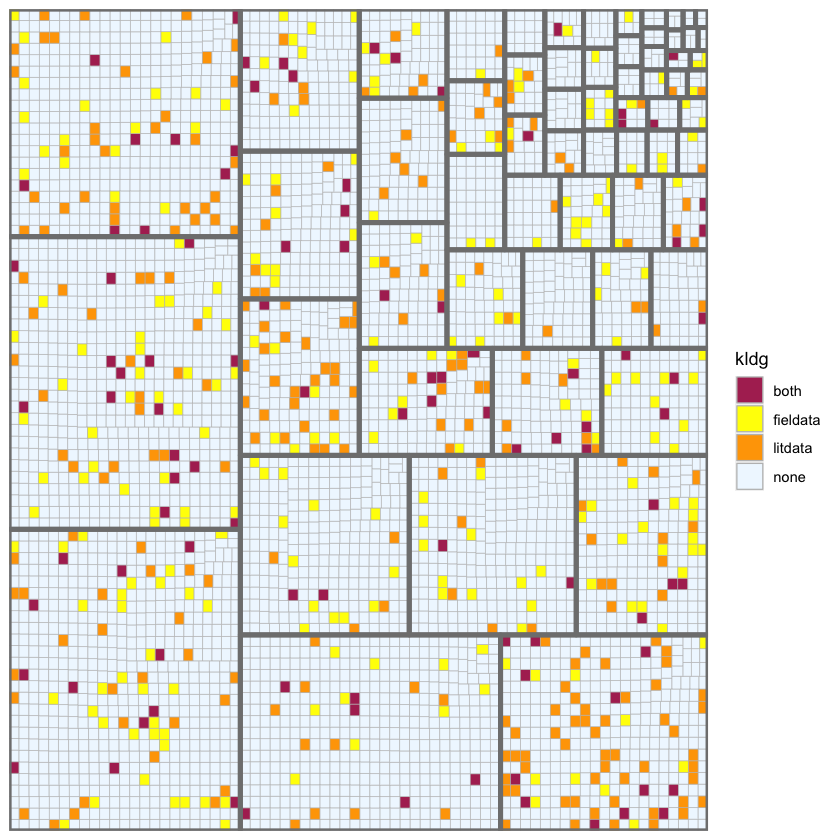

In [10]:
ggplot(gt_table, aes(area=1, fill = kldg, label = genus,
                subgroup = rank_order)) +
  geom_treemap() +
  geom_treemap_subgroup_border() +
  scale_fill_manual(values=clrs)

In [11]:
    filter(is.na(rank_order)) %>% 
    group_by(family) %>%
summarise(n=n_distinct(genus))

family,n
<chr>,<int>
